# TA Class II

## Quick pandas walkthrough

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read data and some basics

In [2]:
df = pd.read_excel('titanic3.xls', index_col=None)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [4]:
df.select_dtypes(include=['int64', 'float64']).head()    #.columns

,pclass,survived,age,sibsp,parch,fare,body
0,1,1,29.0000,0,0,211.3375,NaN
1,1,1,0.9167,1,2,151.5500,NaN
2,1,0,2.0000,1,2,151.5500,NaN
3,1,0,30.0000,1,2,151.5500,135.0
4,1,0,25.0000,1,2,151.5500,NaN


In [5]:
print(df.shape)
df.describe()

(1309, 14)


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
# drop the irrelevant features
df_reduced = df.drop(['name', 'ticket', 'cabin', 'boat', 'body'], axis=1).head()
df_reduced

,pclass,survived,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,1,female,29.0000,0,0,211.3375,S,"St Louis, MO"
1,1,1,male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [7]:
df.isnull().head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [8]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<AxesSubplot:>

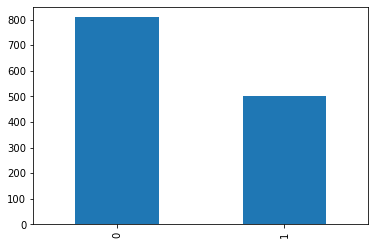

In [9]:
pd.value_counts(df['survived']).plot.bar()

In [10]:
df['survived'].mean()

0.3819709702062643

## Extracting Rows and Columns

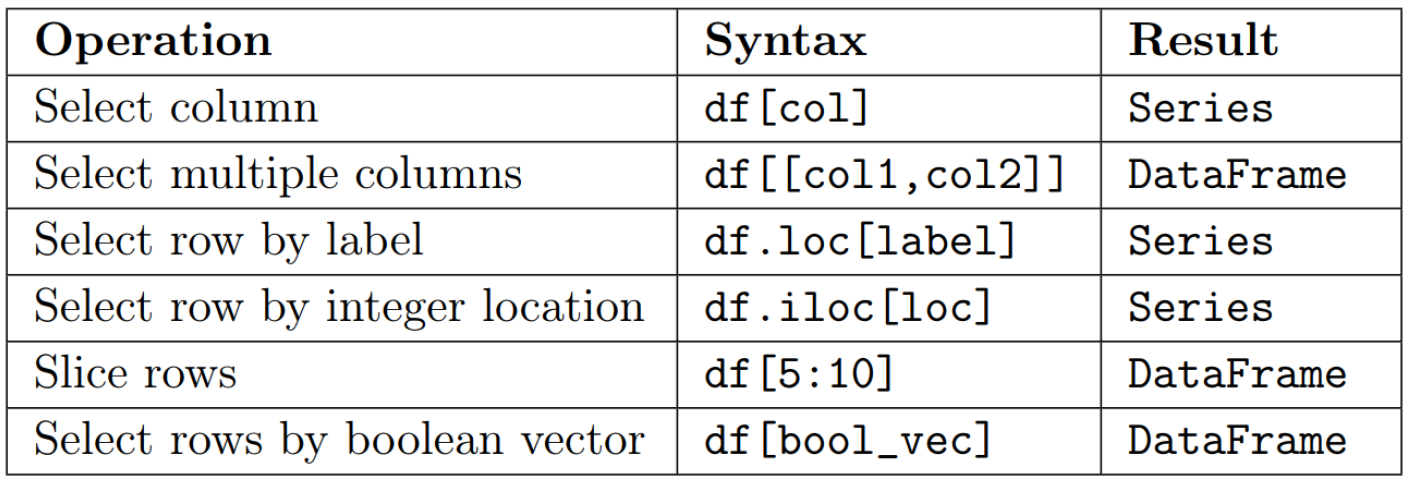

## groupby

In [11]:
df.groupby(['sex']).mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [12]:
df.groupby(['sex','pclass']).mean()

survived        age     sibsp     parch        fare        body
sex    pclass                                                                 
female 1       0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       2       0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       3       0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
male   1       0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
       2       0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
       3       0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

## cut

In [13]:
bins_score = [0, 15, 30, 45, 60, 75, 100]
mylabel = ['0-15', '16-30', '31-45', '46-60', '61-75', '76-100']
df['age_range'] = pd.cut(df['age'], bins_score, include_lowest=True, labels=mylabel)

In [14]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_range
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",16-30
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0-15
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0-15
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",16-30
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",16-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0-15
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,16-30
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,16-30


## groupby + cut

In [15]:
df.groupby(['age_range']).count()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
age_range,,,,,,,,,,,,,,
0-15,115,115,115,115,115,115,115,115,115,17,115,63,4,68
16-30,494,494,494,494,494,494,494,494,494,82,494,178,43,289
31-45,282,282,282,282,282,282,282,282,282,86,281,116,39,192
46-60,122,122,122,122,122,122,122,122,122,69,122,52,24,110
61-75,31,31,31,31,31,31,31,31,30,16,30,6,10,24
76-100,2,2,2,2,2,2,2,2,2,2,2,2,0,2


In [40]:
print(type(df.groupby(['age_range', 'survived']).count().name))
df.groupby(['age_range', 'survived']).count().name

<class 'pandas.core.series.Series'>


age_range  survived
0-15       0            49.0
           1            66.0
16-30      0           312.0
           1           182.0
31-45      0           165.0
           1           117.0
46-60      0            68.0
           1            54.0
61-75      0            25.0
           1             6.0
76-100     0             NaN
           1             2.0
Name: name, dtype: float64

In [72]:
# Those whose age is missing will not be counted
df_new = df.groupby(['age_range', 'survived']).count().name.to_frame() # since names are unique
df_new = df_new.rename(columns={'name':'count'})
df_new

count
age_range survived       
0-15      0          49.0
          1          66.0
16-30     0         312.0
          1         182.0
31-45     0         165.0
          1         117.0
46-60     0          68.0
          1          54.0
61-75     0          25.0
          1           6.0
76-100    0           NaN
          1           2.0

In [73]:
df_new.groupby('survived').sum()

,count
survived,
0,619.0
1,427.0


In [74]:
df_new.groupby('age_range').sum()

,count
age_range,
0-15,115.0
16-30,494.0
31-45,282.0
46-60,122.0
61-75,31.0
76-100,2.0


## Create New dataframe & add new rows

In [97]:
df_0 = pd.DataFrame(columns=['count', 'percentage'])
df_1 = pd.DataFrame(columns=['count', 'percentage'])

In [98]:
print(df_0)
print(df_1)
df_0

Empty DataFrame
Columns: [count, percentage]
Index: []
Empty DataFrame
Columns: [count, percentage]
Index: []


,count,percentage


In [99]:
total_survived_0 = df_new.groupby('survived').sum().iloc[0]['count']
total_survived_1 = df_new.groupby('survived').sum().iloc[1]['count']

In [100]:
for i in range(len(mylabel)):
    age_range = mylabel[i]
    df_0.loc[age_range] = [df_new.iloc[i*2]['count'], df_new.iloc[i*2]['count']/total_survived_0*100]

In [101]:
df_0

,count,percentage
0-15,49.0,7.915994
16-30,312.0,50.403877
31-45,165.0,26.655897
46-60,68.0,10.985460
61-75,25.0,4.038772
76-100,NaN,NaN


In [102]:
df_0 = df_0.fillna(0)
df_0

,count,percentage
0-15,49.0,7.915994
16-30,312.0,50.403877
31-45,165.0,26.655897
46-60,68.0,10.985460
61-75,25.0,4.038772
76-100,0.0,0.000000


In [105]:
for i in range(len(mylabel)):
    age_range = mylabel[i]
    test_series = pd.Series([df_new.iloc[i*2+1]['count'], df_new.iloc[i*2+1]['count']/total_survived_1], index=df_1.columns)
    test_series.name = age_range
    df_1 = df_1.append(test_series, ignore_index=True)

In [106]:
df_1

,count,percentage
0,66.0,0.154567
1,182.0,0.426230
2,117.0,0.274005
3,54.0,0.126464
4,6.0,0.014052
5,2.0,0.004684


## mask

In [17]:
df_under18 = df[df['age']<18].groupby(['sex','pclass']).mean()
df_under18

survived        age     sibsp     parch        fare   body
sex    pclass                                                            
female 1       0.875000  14.125000  0.500000  0.875000  104.083337    NaN
       2       1.000000   8.273150  0.666667  1.166667   27.998844    NaN
       3       0.543478   8.416667  1.456522  1.043478   18.284148  328.0
male   1       0.857143   9.845243  0.571429  1.714286  129.752371    NaN
       2       0.733333   6.222220  0.600000  0.933333   31.750280    NaN
       3       0.233333   9.838888  1.966667  1.016667   21.677570   65.5

## plots

([<matplotlib.axis.XTick at 0x19eee4a8>,
 [Text(0, 0, 'f1'),
  Text(1, 0, 'f2'),
  Text(2, 0, 'f3'),
  Text(3, 0, 'm1'),
  Text(4, 0, 'm2'),
  Text(5, 0, 'm3')])

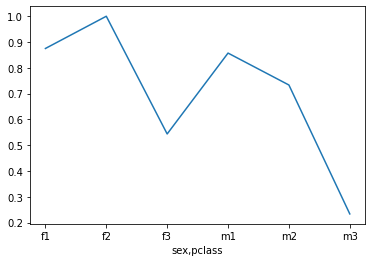

In [18]:
ax = df_under18['survived'].plot()
plt.xticks(range(6), ('f1', 'f2', 'f3', 'm1', 'm2', 'm3'))

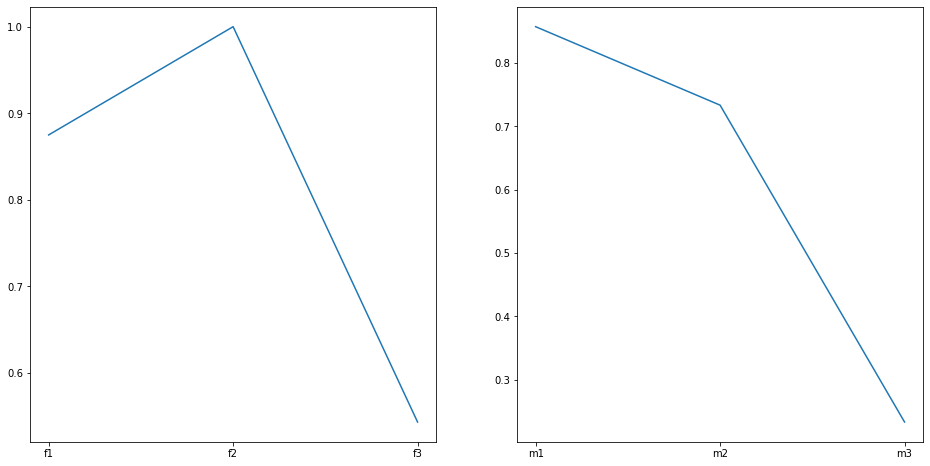

In [19]:
dum = np.zeros(6)
df_under18_survived = pd.DataFrame(dum)
for i in range(6):
    df_under18_survived.iloc[i] = df_under18['survived'][i]    # just some quick and dirty tricks...

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1)
plt.xticks(range(3), ('f1', 'f2', 'f3'))
ax2 = fig.add_subplot(1, 2, 2)
plt.xticks(range(3,6), ('m1', 'm2', 'm3'))    # the constructions of subplots might not be the same way as you think...

ax1.plot(df_under18_survived.iloc[0:3])
ax2.plot(df_under18_survived.iloc[3:6])

In [20]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [21]:
@interact_manual  # or @interact_manual
def show_age_more_than(column=['age'], x=widgets.IntSlider(min=0, max=100, step=1, value=30), y=widgets.IntSlider(min=0, max=100, step=1, value=40)):
    high = max(x,y)
    low  = min(x,y)    
    df_cut = df.loc[df[column] > low]
    df_new = df_cut.loc[high > df_cut[column]]
    print('There are ' + str(df_new.shape[0]) + 'people aged between ' + str(low) + ' to ' + str(high) + ' years old.')
    return df_new

interactive(children=(Dropdown(description='column', options=('age',), value='age'), IntSlider(value=30, descr…

# 　